In [4]:
#Import our dependencies
#=======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import pickle
import seaborn as sns; sns.set(style ='white', color_codes = True)

In [5]:
pd.options.display.max_columns=None

In [6]:
#Pull in my csv
#====================================
df = pd.read_csv("combined_ncaa_player_stats3.csv")
df

,url,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,drafted
0,/cbb/players/menghe-anyam-1.html,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,6/5,2.2,2.4,-4.15,3.0,0
1,/cbb/players/jordan-aaberg-1.html,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,6/9,1.6,3.5,-3.07,2.3,0
2,/cbb/players/karl-aaker-1.html,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,6/5,2.3,4.1,1.37,2.0,0
3,/cbb/players/steve-aaker-1.html,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,6/5,3.0,6.2,3.05,5.1,0
4,/cbb/players/waine-aalto-1.html,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,5/10,1.1,3.1,1.63,1.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109656,/cbb/players/lou-zykiewicz-1.html,Lou Zykiewicz,2.7,0.333,0.9,1.8,0.750,1.3,9.0,NaN,NaN,3.1,-4.16,NaN,0
109657,/cbb/players/jack-zyla-1.html,Jack Zyla,7.7,0.400,3.1,1.2,0.630,0.8,65.0,NaN,1.7,7.0,-12.74,2.0,0
109658,/cbb/players/michal-zylinski-1.html,Michal Zylinski,1.5,0.333,0.5,0.0,NaN,0.0,2.0,6/4,0.5,1.5,-6.49,0.5,0
109659,/cbb/players/brock-zylstra-1.html,Brock Zylstra,4.1,0.429,1.8,1.1,0.674,0.7,119.0,6/6,1.3,5.1,3.51,2.8,0


In [7]:
#replace NAN values with 0

df= df.fillna(0)

In [8]:
def CorrMtx(df, dropDuplicates = True):
    
    # Exclude duplicate correlations by masking uper right values
    
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool_)
        mask[np.triu_indices_from(mask)] = True
    
    # Set background color / chart style
    sns.set_style(style = 'white')
    
    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(16, 12))
    
    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

<AxesSubplot:>

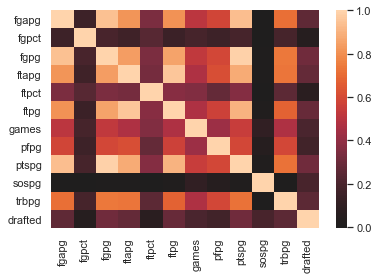

In [9]:
#Creating a heat map to illustrate the features corrrelation to each other
sns.heatmap(df.corr(), center=0)

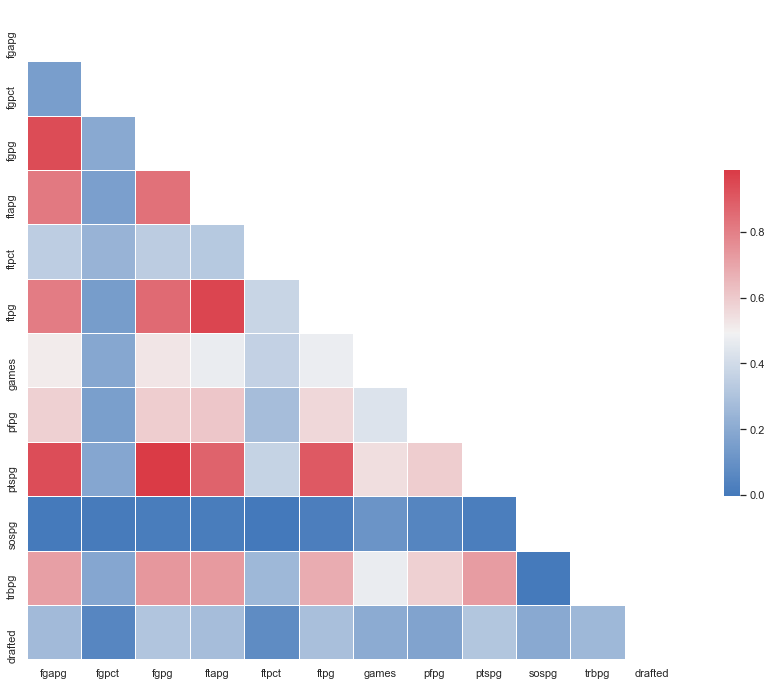

In [10]:
CorrMtx(df.corr(), dropDuplicates=True)

In [11]:
labels = ['Not Drafted', 'Drafted']

In [12]:
#Naming my features which will be used for X later
#=================================================================================
features = df.drop(columns=['drafted','url','name','height'])
features

,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,pfpg,ptspg,sospg,trbpg
0,2.1,0.414,0.9,1.2,0.529,0.7,41.0,2.2,2.4,-4.15,3.0
1,2.3,0.619,1.5,0.7,0.788,0.6,115.0,1.6,3.5,-3.07,2.3
2,4.0,0.346,1.4,0.6,0.611,0.4,92.0,2.3,4.1,1.37,2.0
3,6.1,0.415,2.5,2.3,0.500,1.2,52.0,3.0,6.2,3.05,5.1
4,2.4,0.542,1.3,1.0,0.500,0.5,10.0,1.1,3.1,1.63,1.5
...,...,...,...,...,...,...,...,...,...,...,...
109656,2.7,0.333,0.9,1.8,0.750,1.3,9.0,0.0,3.1,-4.16,0.0
109657,7.7,0.400,3.1,1.2,0.630,0.8,65.0,1.7,7.0,-12.74,2.0
109658,1.5,0.333,0.5,0.0,0.000,0.0,2.0,0.5,1.5,-6.49,0.5
109659,4.1,0.429,1.8,1.1,0.674,0.7,119.0,1.3,5.1,3.51,2.8


In [13]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    #Compute confusion matrix
    cmat = pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)
    print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    #Show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    #Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# K Nearest Neighbor

In [14]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=7)

In [16]:
#Variables
#========================================
X = features
y = df['drafted'].astype(int)

In [17]:
#Train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Cross Validation

In [18]:
knn_cv_score = cross_val_score(knn, X_train, y_train, cv=3)
mean_knn_cv_score = np.mean(knn_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_knn_cv_score * 100))

Mean Cross Validation Score: 97.24%


# Model Testing

In [19]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=7)

In [20]:
#Predict the response for new observations
#==========================================
test_preds = knn.predict(X_test)

In [21]:
#how well did our model predict our correct class? 
accuracy_score(y_test, test_preds)

0.9783083257343391

In [22]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)
print(f'\n{classification_report(y_test, test_preds)}')

Precision Score: 0.7512520868113522
Recall Score: 0.4143646408839779
Accuracy Score: 0.9783083257343391
F1 Score: 0.5341246290801187

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35103
           1       0.75      0.41      0.53      1086

    accuracy                           0.98     36189
   macro avg       0.87      0.71      0.76     36189
weighted avg       0.98      0.98      0.98     36189



Predicted      0    1    All
True                        
0          34954  149  35103
1            636  450   1086
All        35590  599  36189


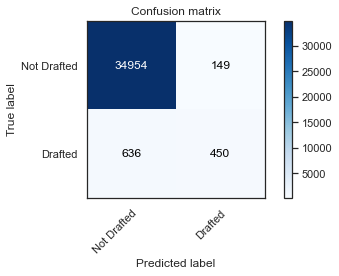

In [23]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_preds, classes=labels,
                      title='Confusion matrix')

plt.show()

# Search Optimal Value Of K for KNN

In [24]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [25]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 5
F1-Score: 0.4324956165984804


In [26]:
# search for an optimal value of K for KNN
k_range = list(range(1, 3))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.9626818020601001, 0.9655246164843179]


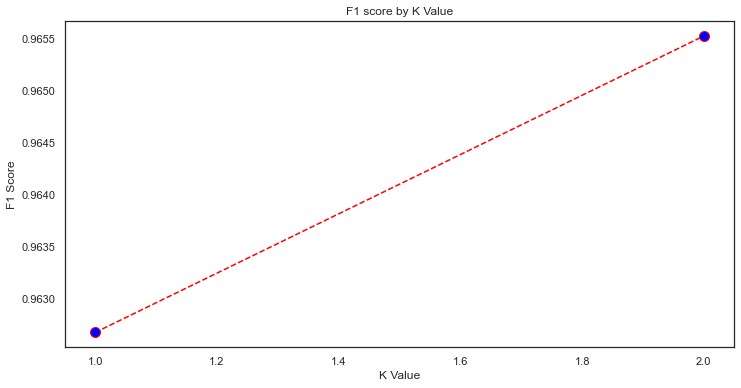

In [27]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 3), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

# Search Optimal Value Of K for KNN Standard Scalar

In [28]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [29]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  


model = KNeighborsClassifier(n_neighbors= 21)
model.fit(X_train_scaled, y_train)

test_pred_scaled = model.predict(X_test_scaled)

In [30]:
find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)

Best Value for k: 3
F1-Score: 0.39346110484780156


In [31]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_pred_scaled)
# print(confusion_matrix(y_test, test_pred_scaled, labels=None, sample_weight=None))
print(f'\n{classification_report(y_test, test_pred_scaled)}')

Precision Score: 0.7176781002638523
Recall Score: 0.2504604051565378
Accuracy Score: 0.9745502777086961
F1 Score: 0.37133105802047783

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35103
           1       0.72      0.25      0.37      1086

    accuracy                           0.97     36189
   macro avg       0.85      0.62      0.68     36189
weighted avg       0.97      0.97      0.97     36189



Predicted      0    1    All
True                        
0          34954  149  35103
1            636  450   1086
All        35590  599  36189


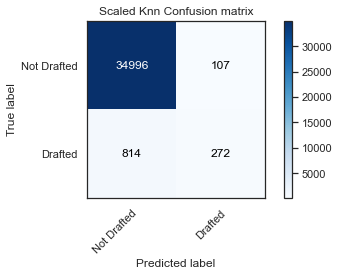

In [32]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_pred_scaled, classes=labels,
                      title='Scaled Knn Confusion matrix')

plt.show()

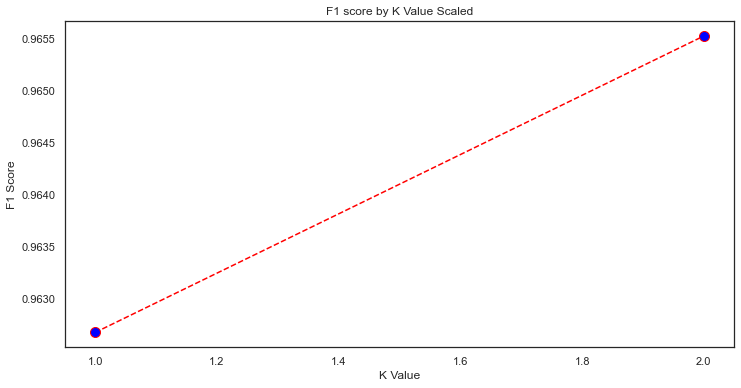

In [33]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 3), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value Scaled')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

# Grid Search KNN

In [34]:
knn_grid_param = {'n_neighbors': [3,5,9,17,21],
                 'weights': ['uniform', 'distance'],
                 'metric': ['euclidean', 'manhattan'] }
knn_grid_search = GridSearchCV(knn, knn_grid_param, verbose=1, cv=3, n_jobs=-1)

knn_gs_results = knn_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [35]:
#Predict values based on new parameters
y_pred_acc = knn_grid_search.predict(X_test)

In [36]:
# New Model Evaluation metrics 
# print("Mean Training Score:", knn_gs_training_score*100)
# print("Mean Testing Score:", knn_gs_testing_score*100)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))
print("Best Parameter Found:")
print(knn_grid_search.best_params_)
print("\nBest Estimator Found:")
print(knn_grid_search.best_estimator_)
print("Best i Score Found:")
print(knn_grid_search.best_score_)

Accuracy Score : 0.9753516261847522
Precision Score : 0.7287735849056604
Recall Score : 0.2845303867403315
F1 Score : 0.409271523178808
Best Parameter Found:
{'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'distance'}

Best Estimator Found:
KNeighborsClassifier(metric='euclidean', n_neighbors=21, weights='distance')
Best i Score Found:
0.973867594141868


# Grid Search Confusion Matrix

Predicted      0    1    All
True                        
0          34954  149  35103
1            636  450   1086
All        35590  599  36189


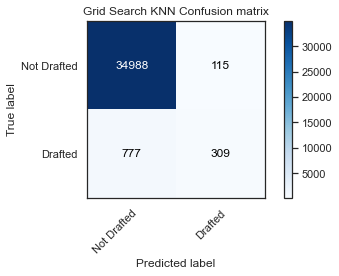

In [37]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_acc, classes=labels,
                      title='Grid Search KNN Confusion matrix')

plt.show()